### Task Internal Clock: Implement internal clock class
* Implement internal clock class into 

In [1]:
import os
import copy
import numpy as np
import time
import math
import matplotlib.pyplot as plt
cwd =  os.getcwd().replace("notebooks/test","")
os.chdir(cwd)

from python.dev.event import Deposit
from python.dev.event import Withdraw
from python.dev.cpt import Liquidity
from python.dev.token import RebaseToken
from python.dev.math.model import TimeDeltaModel
from python.dev.math.model import TokenDeltaModel
from python.dev.math.interest.ips import ConstantIPS
from python.dev.math.interest.ips.aggregate import AggregateIPS
from python.dev.math.interest import CompoundReturn

In [2]:
APY = 0.1
TYPE_DEPOSIT_TOKEN = 'DEPOSIT'
deposit = 10000 
N_ADDR = 2
ADDR = N_ADDR * [None]

token = RebaseToken(TYPE_DEPOSIT_TOKEN)

for k in range(N_ADDR):
    ADDR[k] = token.mint(deposit, APY)  

In [3]:
percent = 0.05
N = 250

for k in range(N):

    token_delta = TokenDeltaModel(1,100).apply() 
    time_delta = TimeDeltaModel().apply() 
    token.add_event(Deposit(APY, token_delta, time_delta, ADDR[0]))
    token.update_rebases(APY, ADDR)
    
    if (k % int(N/(100*percent)) == 0):
        out_str = '[SIM {}]'.format(k)
        
        amt = token.get_balance_deposits()
        out_str = out_str+' T{}: {:.2f}'.format(k+1,amt)
            
        print(out_str) 

[SIM 0] T1: 20057.81
[SIM 50] T51: 26295.91
[SIM 100] T101: 30866.58
[SIM 150] T151: 36913.39
[SIM 200] T201: 42698.28


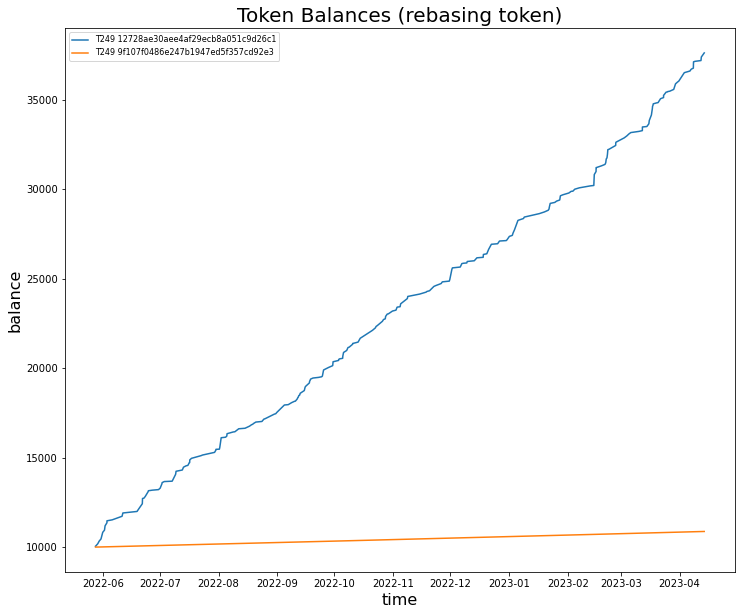

In [4]:
T_states = N_ADDR*[None]
final_balances = N_ADDR*[0]

fig, (T_ax) = plt.subplots(nrows=1, sharex=True, sharey=False, figsize=(12, 10))

for m in range(2):
    T_states = token.get_state_series(ADDR[m])
    tSamp = T_states.get_tstamp() 
    balance = T_states.get_balance() 
    final_balances[m] = balance[-1]
    T_ax.plot(tSamp, balance, label='T{} {}'.format(k,ADDR[m])) 

T_ax.set_title("Token Balances (rebasing token)", fontsize=20)
T_ax.set_ylabel("balance", fontsize=16)
T_ax.set_xlabel('time', fontsize=16)
T_ax.legend(fontsize=8)
